In [19]:
from api_dev import RsoxsServer as Server
from time import perf_counter
import numpy as np

In [2]:
conn = await Server.create()

In [3]:
res = await conn.get_instrument_driver_status(name="Axis Photonique")
res

{'success': True,
 'error description': 'no error',
 'log?': False,
 'running': True,
 'API_delta_t': 0.009935855865478516}

In [4]:
_ = await conn.setup_detector("Axis Photonique")
print(conn.detector_ready)

True


In [6]:
exposure = 0.5
start = perf_counter()
res = await conn.start_instrument_acquire(name="Axis Photonique", run_type="Exposure", acq_time_s=exposure)
inst_acq = perf_counter() - start

In [7]:
res

{'success': True,
 'error description': 'no error',
 'log?': True,
 'elapsed_s': 0.929355199972633,
 'API_delta_t': 0.9408683776855469}

In [8]:
inst_acq - exposure

0.4411310001742095

In [10]:
start = perf_counter()
res = await conn.stop_instrument_acquire(name="Axis Photonique")
inst_acq = perf_counter() - start
res

{'success': False,
 'error description': 'timed out',
 'log?': True,
 'API_delta_t': 0.5219414234161377}

In [17]:
from pathlib import Path

files = Path("C:/Beamline Controls/BCS Setup Data")
fits = list(files.rglob("*/*.fits"))
fit_dirs = {f.parent for f in fits}
print(fit_dirs)

{WindowsPath('C:/Beamline Controls/BCS Setup Data/250407/From File Scan 000707 Images'), WindowsPath('C:/Beamline Controls/BCS Setup Data/251215/From File Scan 009981 Images'), WindowsPath('C:/Beamline Controls/BCS Setup Data/250419/From File Scan 002404 Images'), WindowsPath('C:/Beamline Controls/BCS Setup Data/250408/From File Scan 000709 Images'), WindowsPath('C:/Beamline Controls/BCS Setup Data/250319/Single Motor Scan 000265 Images'), WindowsPath('C:/Beamline Controls/BCS Setup Data/251027/From File Scan 008414 Images'), WindowsPath('C:/Beamline Controls/BCS Setup Data/250418/From File Scan 002248 Images'), WindowsPath('C:/Beamline Controls/BCS Setup Data/250408/From File Scan 000716 Images'), WindowsPath('C:/Beamline Controls/BCS Setup Data/250511/From File Scan 005435 Images'), WindowsPath('C:/Beamline Controls/BCS Setup Data/250419/From File Scan 002331 Images'), WindowsPath('C:/Beamline Controls/BCS Setup Data/250418/From File Scan 002250 Images'), WindowsPath('C:/Beamline Con

In [9]:
rsp = await conn.get_folder_listing()
rsp

{'success': True,
 'error description': '',
 'log?': False,
 'files': [],
 'folders': [],
 'API_delta_t': 0.011420249938964844}

In [9]:
start = perf_counter()
img = await conn.get_instrument_acquired2d(name="Axis Photonique")
final_acq = perf_counter() - start
#img

In [20]:
data = np.array(img['data'])

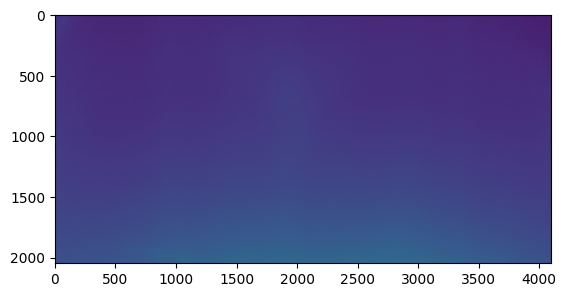

In [22]:
import matplotlib.pyplot as plt
plt.imshow(data)

In [30]:
conn.__dir__()

['detector_ready',
 'ai',
 'motor',
 'dio',
 '_scan_executor',
 '_zmq_socket',
 '_RsoxsServer__public_key',
 '__module__',
 '__firstlineno__',
 '__doc__',
 'CONFIG',
 '__init__',
 'connect_with_env',
 'create',
 'setup_detector',
 'scan_from_dataframe',
 'abort_scan',
 'is_scanning',
 '__static_attributes__',
 '_get_server_public_key',
 'connect',
 'bcs_request',
 'acquire_data',
 'at_preset',
 'at_trajectory',
 'close_display',
 'command_motor',
 'current_scan_running',
 'disable_breakpoints',
 'disable_motor',
 'enable_motor',
 'get_acquired',
 'get_acquired_array',
 'get_acquire_status',
 'get_bcsconfiguration',
 'get_di',
 'get_display_status',
 'get_flying_positions',
 'get_folder_listing',
 'get_freerun',
 'get_freerun_array',
 'get_instrument_acquired1d',
 'get_instrument_acquired2d',
 'get_instrument_acquired3d',
 'get_instrument_acquisition_info',
 'get_instrument_acquisition_status',
 'get_instrument_count_rates',
 'get_instrument_driver_status',
 'get_motor',
 'get_motor_ful

In [2]:
from bcs import BCSz

server = BCSz.BCSServer()
await server.connect()

Server Public Key b'5ssC)KF]<H%1Ks#rhbN-Bqo6y]H7#F)t@GZqy#/.'


In [4]:
await server.get_instrument_acquired2d("Axis Photonique")

{'success': True,
 'error description': 'no error',
 'log?': False,
 'data': [],
 'API_delta_t': 0.006557941436767578}